# Test Model Via Endpoint 

## Disclaimer!

You should update in conf.py the following variables:

- training_job_name
- model_data

In [1]:
import conf
import sagemaker
from sagemaker import get_execution_role
from sagemaker.model import Model

role = get_execution_role()

print(role)

bucket = conf.SESSION_BUCKET
sess = sagemaker.Session(default_bucket=bucket)

COLORS = conf.class_colors

arn:aws:iam::664457504912:role/service-role/AmazonSageMaker-ExecutionRole-20200423T115075


In [2]:
import conf
import boto3
import json
import csv

# grab environment variables
ENDPOINT_NAME = conf.endpoint_name
runtime= boto3.client('runtime.sagemaker')

In [8]:
# Modified from AWS Code
def visualize_detection(img_file, dets, classes=[], img_path='', thresh=0.6, save=False, destiny=''):
        """
        visualize detections in one image
        Parameters:
        ----------
        img : numpy.array
            image, in bgr format
        dets : numpy.array
            ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
            each row is one object
        classes : tuple or list of str
            class names
        thresh : float
            score threshold
        """
        import random
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg

        img=mpimg.imread(img_path + '/' + img_file)
        plt.imshow(img)
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0 * width)
            ymin = int(y0 * height)
            xmax = int(x1 * width)
            ymax = int(y1 * height)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 color=COLORS[cls_id],
                                 linewidth=1.0)
            plt.gca().add_patch(rect)
            class_name = str(cls_id)
            if classes and len(classes) > cls_id:
                class_name = classes[cls_id]
            plt.gca().text(xmin, ymin - 2,
                            '{:s} {:.3f}'.format(class_name, score),
                            bbox=dict(facecolor=COLORS[cls_id], alpha=0.5),
                                  fontsize=8, color='black')
        if save and destiny is not None:
            plt.savefig(destiny + '/' + img_file.replace('.', '-detection.'), dpi=200)
        plt.show()

In [16]:
import os

test_image_base_path = conf.test_image_base_path
detection_image_base_path = conf.detection_image_base_path

images_path = os.listdir(test_image_base_path)
images_path.sort()

if '.ipynb_checkpoints' in images_path:
    images_path.remove('.ipynb_checkpoints')
    
images_path

['0.jpeg',
 '1.jpeg',
 '2.jpeg',
 '3.jpeg',
 '4.jpeg',
 '5.jpeg',
 '6.jpeg',
 '7.jpeg',
 '8.jpeg',
 '9.jpeg']

{'ResponseMetadata': {'RequestId': '609aae8d-c767-420e-8985-da5b9db68272', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '609aae8d-c767-420e-8985-da5b9db68272', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:12:56 GMT', 'content-type': 'application/json', 'content-length': '5907'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb3c3ac080>}


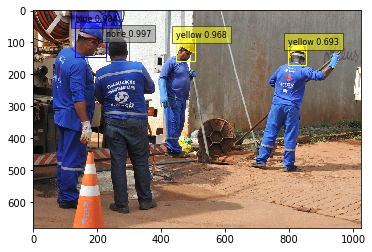

{'ResponseMetadata': {'RequestId': 'ca50f9a3-d375-4282-9a68-a18a1f4da264', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'ca50f9a3-d375-4282-9a68-a18a1f4da264', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:12:57 GMT', 'content-type': 'application/json', 'content-length': '456'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb3c6cb2b0>}


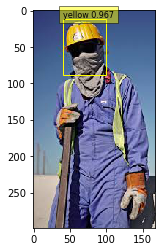

{'ResponseMetadata': {'RequestId': '0327f356-754a-4a89-ac4c-b1dbf08ff20e', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '0327f356-754a-4a89-ac4c-b1dbf08ff20e', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:12:58 GMT', 'content-type': 'application/json', 'content-length': '564'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb39bf17f0>}


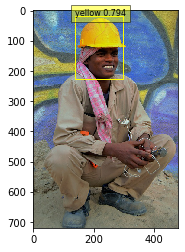

{'ResponseMetadata': {'RequestId': '655069fa-71f2-43ca-97d8-fb2d429a483f', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '655069fa-71f2-43ca-97d8-fb2d429a483f', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:12:59 GMT', 'content-type': 'application/json', 'content-length': '12563'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb3c520be0>}


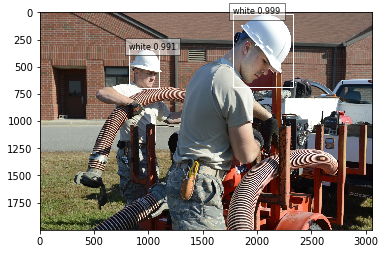

{'ResponseMetadata': {'RequestId': '1015741d-8ee7-43d9-867b-807d851ec031', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '1015741d-8ee7-43d9-867b-807d851ec031', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:13:00 GMT', 'content-type': 'application/json', 'content-length': '344'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb39c32d68>}


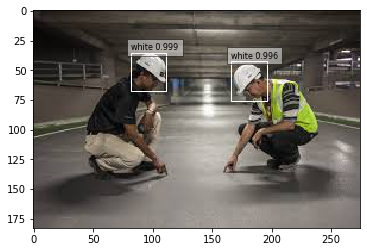

{'ResponseMetadata': {'RequestId': '471bc0d4-f683-4fa0-9b48-5203e5a47b69', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '471bc0d4-f683-4fa0-9b48-5203e5a47b69', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:13:01 GMT', 'content-type': 'application/json', 'content-length': '451'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb39b554a8>}


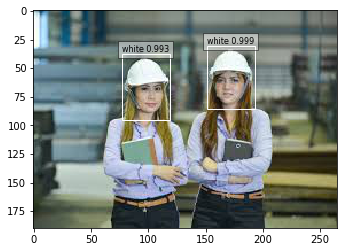

{'ResponseMetadata': {'RequestId': '60c99429-8b07-419f-941e-2af444fd40f5', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '60c99429-8b07-419f-941e-2af444fd40f5', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:13:02 GMT', 'content-type': 'application/json', 'content-length': '7923'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb39b6d860>}


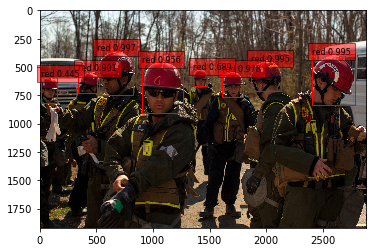

{'ResponseMetadata': {'RequestId': '338c7431-40f0-4581-afec-3b9de306b4e3', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '338c7431-40f0-4581-afec-3b9de306b4e3', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:13:03 GMT', 'content-type': 'application/json', 'content-length': '4173'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb3c688780>}


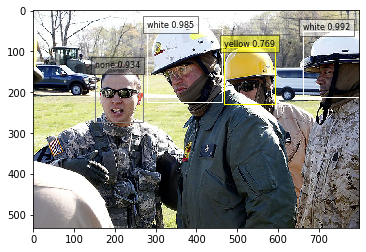

{'ResponseMetadata': {'RequestId': '0a967c58-8e43-4b38-9e0d-27d18ae6295e', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '0a967c58-8e43-4b38-9e0d-27d18ae6295e', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:13:04 GMT', 'content-type': 'application/json', 'content-length': '1561'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb3c5df5f8>}


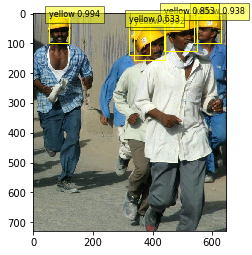

{'ResponseMetadata': {'RequestId': '193b7a78-f0f5-4710-a434-874bdd04abda', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '193b7a78-f0f5-4710-a434-874bdd04abda', 'x-amzn-invoked-production-variant': 'AllTraffic', 'date': 'Wed, 12 Aug 2020 16:13:05 GMT', 'content-type': 'application/json', 'content-length': '3373'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'AllTraffic', 'Body': <botocore.response.StreamingBody object at 0x7fcb3c29d630>}


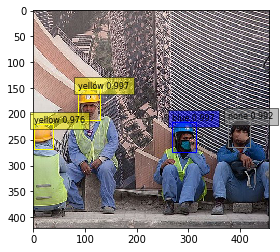

In [19]:
import json

object_categories = conf.object_categories

# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
write_bytes_flag = False
threshold = 0.4

# Visualize the detections.

for file_name in images_path:

    with open(test_image_base_path + '/' + file_name, 'rb') as image:
        f = image.read()
        image.close()
    b = bytearray(f)
    
    if write_bytes_flag:
        ne = open('{}.txt'.format(file_name.split('.')[0], 'wb'))
        ne.write(b)

    response = runtime.invoke_endpoint(EndpointName=ENDPOINT_NAME,
                               ContentType='image/jpeg',
                               Body=b)
    print(response)
    
    detections = json.loads(response['Body'].read().decode())
    
    visualize_detection(file_name,
                        detections['prediction'],
                        object_categories,
                        img_path=test_image_base_path,
                        thresh=threshold,
                        save=True,
                        destiny=detection_image_base_path)
